# Task 1

#### The goal is to analyze transaction and customer data to uncover purchasing trends and behaviors, with a specific focus on customer segments and their chip purchasing habits. The insights will be used to form a strategic recommendation for Julia, the Category Manager, to support an upcoming category review.

In [2]:
# import libraries

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [3]:
# read the dataset

transactionData = pd.read_excel("QVI_transaction_data.xlsx")
customerData = pd.read_csv("QVI_purchase_behaviour.csv")

#### Performing basic operations to study the given data

In [4]:
# display first ten rows from transaction data

transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
transactionData.shape

(264836, 8)

In [6]:
# check for incorrect datatypes
transactionData.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [7]:
# convert the DATE column from integer to datetime format
transactionData['DATE'] = pd.to_datetime(transactionData['DATE'], unit = 'D', origin ='1899-12-30')

In [8]:
transactionData.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9


In [9]:
# check for missing data
transactionData.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [10]:
# check for duplicates
transactionData.duplicated().sum()

1

In [11]:
# remove duplicate rows
transactionData = transactionData.drop_duplicates()

In [12]:
# generate the summary of PROD_NAME column
prod_name_summary = transactionData['PROD_NAME'].describe()
print(prod_name_summary)

count                                     264835
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object


In [13]:
# get unique product names from the dataset
unique_names = transactionData['PROD_NAME'].unique()

unique_names[:10]

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G'], dtype=object)

#### Performing a basic text analysis to check if all entries in the PROD_NAME column actually refer to chips

In [14]:
# split the product names into words
product_names = transactionData['PROD_NAME'].str.lower().str.replace(r"([0-9]+[gG])", "",regex = True)
product_names = product_names.str.replace(r'[^\w]',' ', regex = True)
all_words = product_names.str.split(expand=True).stack()

#count word frequencies
word_counts = all_words.value_counts().reset_index()
word_counts.columns = ['word','count']

word_counts

,word,count
0,chips,49770
1,kettle,41288
2,smiths,28859
3,salt,27976
4,cheese,27890
...,...,...
192,sunbites,1432
193,pc,1431
194,ncc,1419
195,garden,1419


In [15]:
# remove rows where "salsa" appears in the PROD_NAME column

transactionData = transactionData[~ transactionData["PROD_NAME"].str.contains("salsa", case =False)]

In [16]:
transactionData.shape

(246741, 8)

In [17]:
# check summary
transactionData.describe(include = 'all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,246741,246741.000000,2.467410e+05,2.467410e+05,246741.000000,246741,246741.000000,246741.000000
unique,NaN,NaN,NaN,NaN,NaN,105,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,2018-12-30 01:19:32.745510656,135.051212,1.355311e+05,1.351312e+05,56.351835,NaN,1.908061,7.321328
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756900e+04,26.000000,NaN,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351840e+05,53.000000,NaN,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026540e+05,87.000000,NaN,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,NaN,200.000000,650.000000


-  There are no null values in the dataset
-  Product Quantity seems to have some outliers

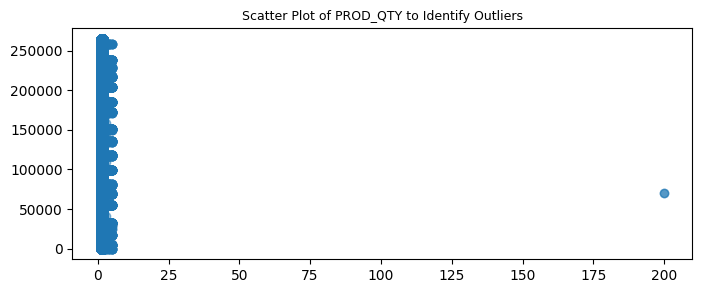

In [18]:
# check outliers in PROD_QTY
plt.figure(figsize= (8,3))
plt.scatter(transactionData['PROD_QTY'],transactionData.index, alpha= 0.5)
plt.title("Scatter Plot of PROD_QTY to Identify Outliers", fontsize = 9)
plt.show()

In [19]:
# filter the dataset to find the outlier
transactionData[transactionData['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


-  There are two transactions where 200 packets of chips are bought in one transaction
 and both of these transactions were by the same customer. 

In [20]:
# filter to see what other transactions that customer has made
transactionData[transactionData['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


-   The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card number from further analysis since this data point would skew the analysis.

In [21]:
# filter out the customer based on the loyalty card number
transactionData = transactionData[transactionData['LYLTY_CARD_NBR']!= 226000].reset_index(drop = True)

In [22]:
count_txn_id = transactionData.groupby('DATE')['TXN_ID'].count().reset_index(name='TRANSACTION_COUNT')
count_txn_id

,DATE,TRANSACTION_COUNT
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


-  Since there are 364 rows, one day is missing. We need to create a sequence of all dates from July 1, 2018, to June 30, 2019, to identify the missing date.

In [23]:
# create data points for date range from '2018-07-01' to '2019-06-30'
date_range = pd.date_range(start = '2018-07-01', end='2019-06-30', name = 'DATE')
date_df = pd.DataFrame(date_range)
date_df.head()

,DATE
0,2018-07-01
1,2018-07-02
2,2018-07-03
3,2018-07-04
4,2018-07-05


In [24]:
# merge the date_df with the transaction counts
transactions_by_day = pd.merge(date_df, count_txn_id, on ='DATE', how='left')

# find the missing date
missing_dates = transactions_by_day[transactions_by_day['TRANSACTION_COUNT'].isna()]
print(missing_dates)

          DATE  TRANSACTION_COUNT
177 2018-12-25                NaN


In [25]:
# fill the missing transaction counts with zero
transactions_by_day['TRANSACTION_COUNT'].fillna(0, inplace = True)

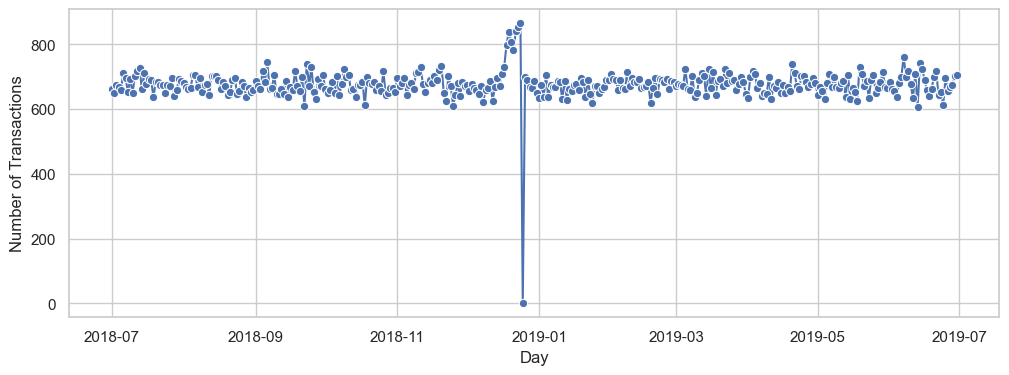

In [26]:
# plot transactions over time
plt.figure(figsize = (12,4))
sns.set_theme(style = 'whitegrid')
sns.lineplot(data = transactions_by_day, x = 'DATE', y='TRANSACTION_COUNT', marker = 'o')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.show()

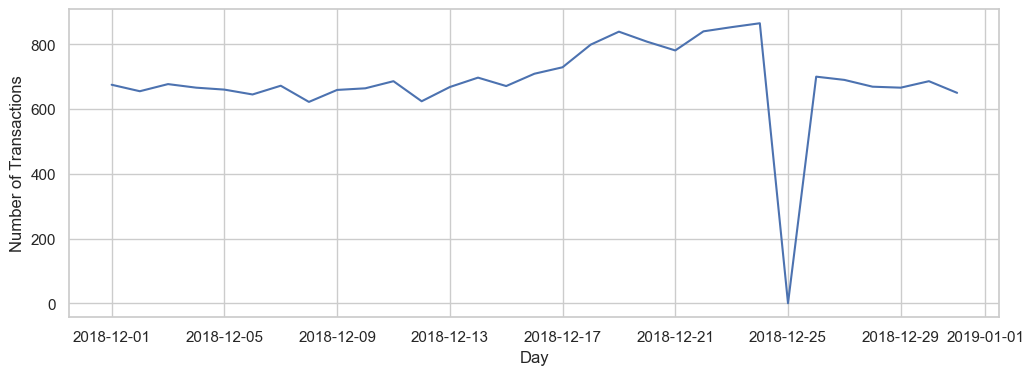

In [27]:
# filter transaction counts for december month
december_transactions = transactions_by_day[transactions_by_day['DATE'].dt.month == 12]

plt.figure(figsize = (12,4))
plt.plot(december_transactions['DATE'], december_transactions['TRANSACTION_COUNT'])
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.show()

-  We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.
-  Now that we are satisfied that the data no longer has outliers, we can move on to creating other features such as brand of chips or pack size from PROD_NAME.

In [28]:
transactionData.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9


In [29]:
# extract the number from product name to get the pack size
transactionData['PACK_SIZE'] = transactionData['PROD_NAME'].str.extract(r"(\d+)[gG]")[0].astype('int')

In [30]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [31]:
# check if pack_size column makes sense

# groupby pack_size and count the number of occurances
pack_size_counts = transactionData.groupby('PACK_SIZE').size().reset_index(name='COUNT').sort_values(by='PACK_SIZE')
print(pack_size_counts)

    PACK_SIZE  COUNT
0          70   1507
1          90   3008
2         110  22387
3         125   1454
4         134  25102
5         135   3257
6         150  40203
7         160   2970
8         165  15297
9         170  19983
10        175  66389
11        180   1468
12        190   2995
13        200   4473
14        210   6272
15        220   1564
16        250   3169
17        270   6285
18        330  12540
19        380   6416


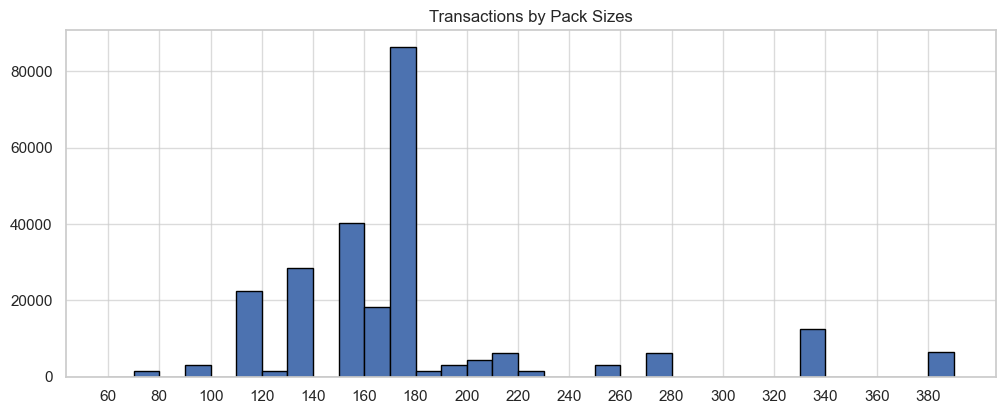

In [32]:
# plot a histogram of PACK_SIZE
plt.figure(figsize = [12,4.5])
plt.hist(x=transactionData['PACK_SIZE'], bins = range(60,400,10), edgecolor='black')
plt.title('Transactions by Pack Sizes')
plt.xticks(range(60,400,20))
plt.grid(alpha = 0.7)
plt.show()

#### Insights:
-  The histogram indicates that the highest number of transactions occur for pack sizes between 150g and 175g, with the peak at 175g. This suggests a strong consumer preference for these pack sizes.
-  There are also significant transactions for pack sizes 110g, 134g. These could be secondary popular choices among consumers.

In [33]:
# create brand names
transactionData['BRAND'] = transactionData["PROD_NAME"].str.split(" ").str[0]

In [34]:
transactionData.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths


In [35]:
transactionData['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

#### Insights:
-  We can observe multiple brand names that are either misspelled or abbreviated, and these would be treated as different categories in our analysis, thus we should standardize them for consistency.

In [36]:
# create a dictionary of standardized brand names
brand_corrections = {
    "Dorito": "Doritos",
    "GrnWves": "Grain Waves",
    "Grain": "Grain Waves",
    "Infzns": "Infuzions",
    "Natural": "NCC",
    "Red": "RRD",
    "Smith": "Smiths",
    "Snbts": "Sunbites",
    "WW": "Woolworths"
}

transactionData['BRAND'] = transactionData['BRAND'].map(brand_corrections).fillna(transactionData['BRAND']) 

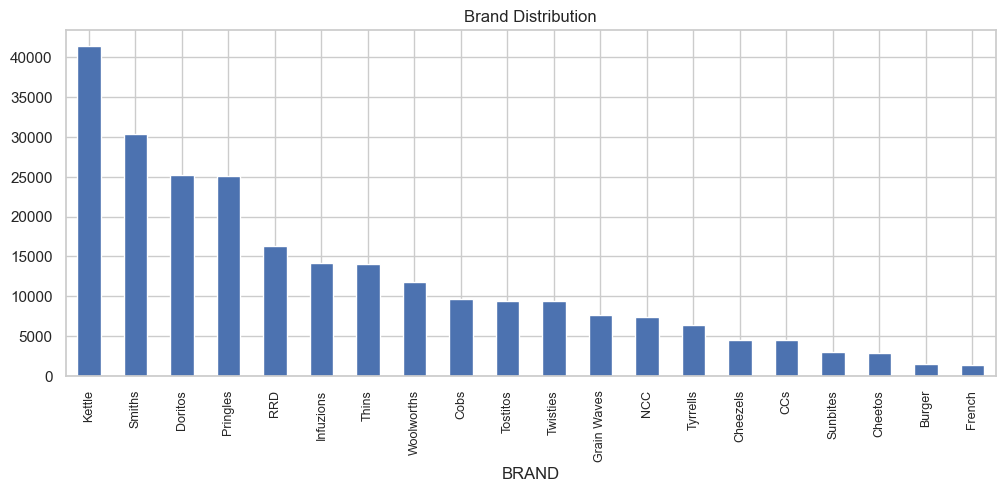

In [37]:
# plot brand distribution
brand_counts = transactionData['BRAND'].value_counts()
plt.figure(figsize = [12,4.5])
brand_counts.plot(kind='bar')
plt.title("Brand Distribution")
plt.xticks(fontsize =9)
plt.show()

#### Insights:
-  The bar chart shows that Kettle, Smiths, Doritos, and Pringles have the highest transaction counts, each exceeding 20,000 purchases. This suggests that these brands are the most popular among customers, likely due to their strong market presence, brand loyalty, or wide availability.

In [38]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NCC
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


In [39]:
# Examining customer data
customerData.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [40]:
customerData.shape

(72637, 3)

In [41]:
customerData['LYLTY_CARD_NBR'].value_counts()

LYLTY_CARD_NBR
1000       1
181211     1
181217     1
181216     1
181215     1
          ..
88126      1
88127      1
88128      1
88129      1
2373711    1
Name: count, Length: 72637, dtype: int64

In [42]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [43]:
customerData['LIFESTAGE'].value_counts()

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

In [44]:
customerData['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

#### Insights
-  The customer dataset contains 72,637 entries with no missing values.
-  Retirees form the largest customer group, accounting for 14,805 entries.
-  New Families have the lowest count 2,549; suggesting they might purchase fewer chips.
-  Mainstream customers dominate, making up 29,245 of the entries.
-  There are more Budget customers (24,470) compared to Premium customers (18,922).

In [45]:
# merge both datasets
merged_data = pd.merge(transactionData, customerData, on='LYLTY_CARD_NBR', how='left')
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NCC,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [46]:
merged_data.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [47]:
# save the merged data to a CSV file
#file_path = "QVI_data.csv"
#merged_data.to_csv(file_path, index = False)

#### Data analysis on customer segments 

In [48]:
#merged_data = pd.read_csv("QVI_data.csv")

In [49]:
merged_data.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NCC,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


#### Total Sales Analysis
-  Find out which customer segment contributes the most to total sales of chips.
-  Are certain lifestages or premium categories spending more?

In [50]:
# group total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales_summary = merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

In [51]:
sales_summary

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,33345.70
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25
2,MIDAGE SINGLES/COUPLES,Premium,54443.85
3,NEW FAMILIES,Budget,20607.45
4,NEW FAMILIES,Mainstream,15979.70
5,NEW FAMILIES,Premium,10760.80
6,OLDER FAMILIES,Budget,156863.75
7,OLDER FAMILIES,Mainstream,96413.55
8,OLDER FAMILIES,Premium,75242.60
9,OLDER SINGLES/COUPLES,Budget,127833.60


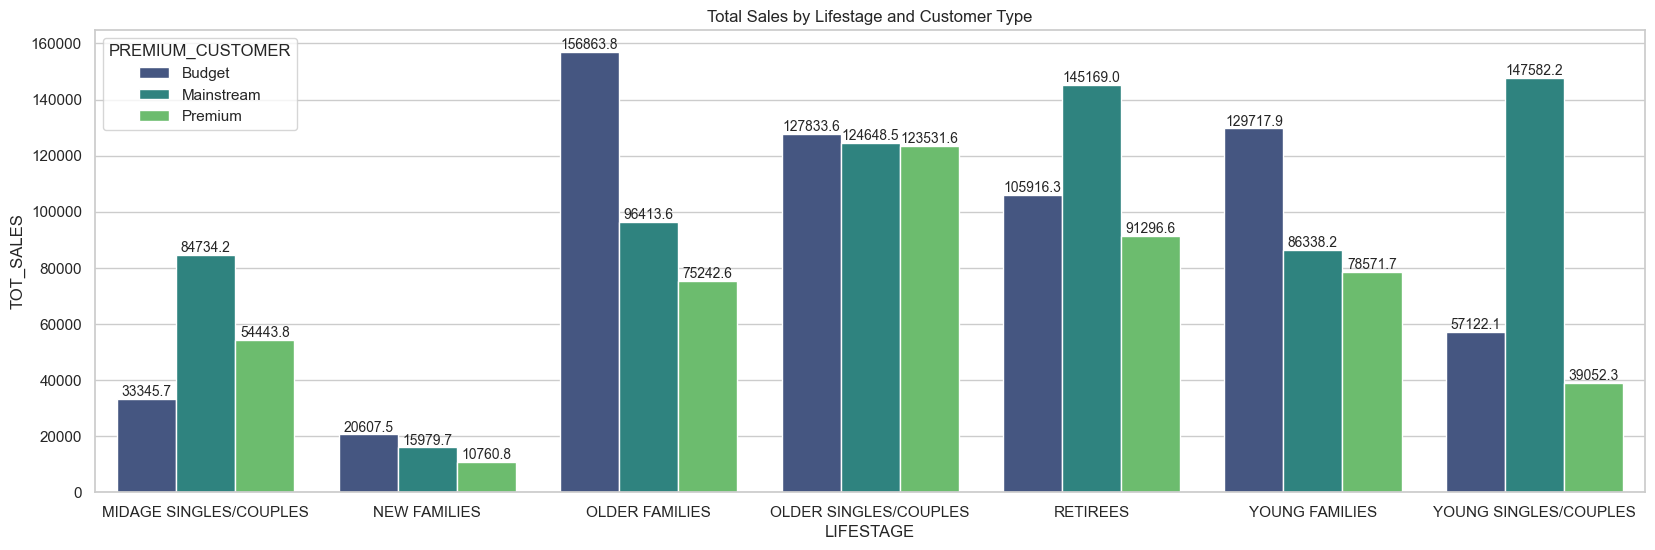

In [52]:
# Create a bar plot to show total sales by segment
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=sales_summary, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize = 10)

plt.title("Total Sales by Lifestage and Customer Type")
plt.show()

#### Insights:
-  Based on total sales data, Older Families, Older singles/couples and retirees are the highest spenders on chips among the lifestages. This lifestage contributes the most to the overall chip sales.
-  New families are the lowest spenders.

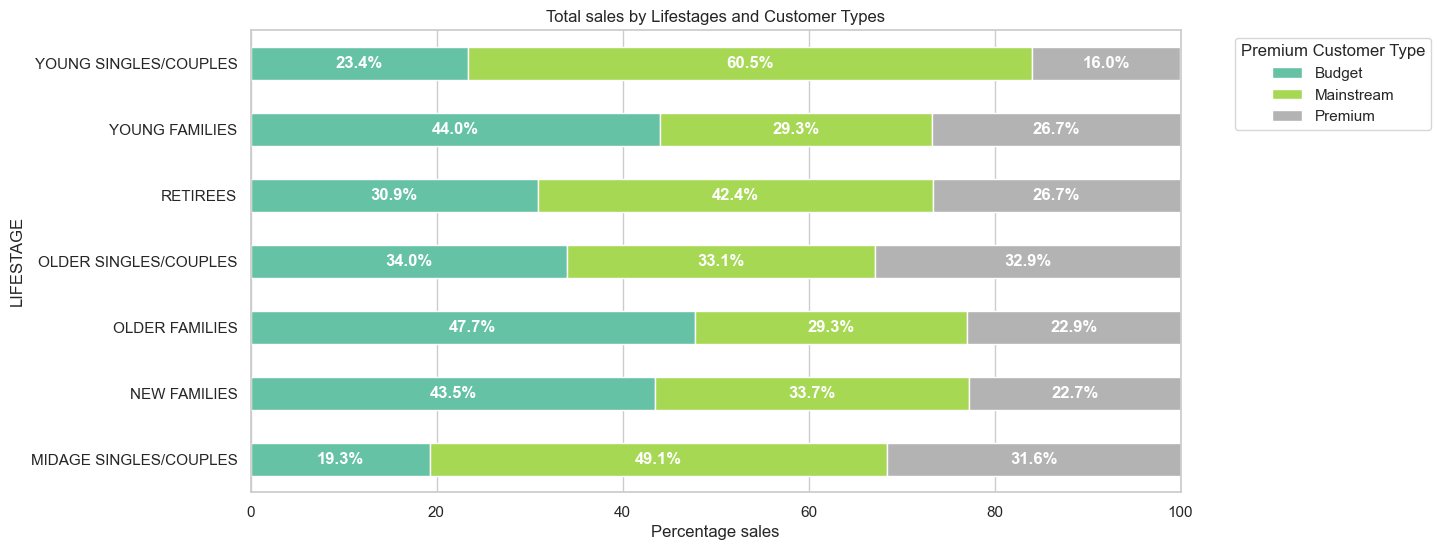

In [53]:
# let us visualize the distribution of different customer segments within each lifestage group to understand better

# create a pivot table to get percentage distribution
stacked_data = sales_summary.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='TOT_SALES')
stacked_data = stacked_data.div(stacked_data.sum(axis=1), axis=0)*100

# plot stacked bar chart
fig,ax = plt.subplots(figsize = (12,6))
stacked_data.plot(kind='barh', stacked = True, ax=ax, colormap = 'Set2')
# add labels
for i, (index,row) in enumerate(stacked_data.iterrows()):
    left = 0
    for col in stacked_data.columns:
        value = row[col]
        ax.annotate(f"{value:.1f}%", xy=(left+value/2, i), color = 'white', fontweight = 'bold', ha='center', va='center')
        left+=value

plt.title("Total sales by Lifestages and Customer Types")
plt.xlabel('Percentage sales')
plt.legend(title='Premium Customer Type', bbox_to_anchor=(1.05, 1))
plt.xlim(0,100)
plt.show()

#### Insights:
-  Older Singles/couples show an even distribution across all the three customer segments but they also lead in premium customer spending, suggesting a preference for premium products.
-  Mainstream customers constitute the largest segment among Young Singles/Couples, Older Singles/Couples, and Retirees. This suggests that these lifestages favor mid-range priced chips.
-  Older Families lifestage contribute the most to total sales across all lifestages, yet their highest sales comes from the budget customer segment. Similarly, the budget customer category or budget spending is mostly found among Young Families and New Families lifestages.

-----------

#### Number of Customers per Segment
-  Check how many customers exist in each segment.
-  This helps determine if high sales come from more customers or higher spending per customer.

In [54]:
# count the number of unique customers in each customer segment
no_of_cust = pd.pivot_table(merged_data, index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='LYLTY_CARD_NBR',
                                  aggfunc='nunique')
no_of_cust['TOTAL'] = no_of_cust.sum(axis=1)

percentage_of_cust = no_of_cust.div(no_of_cust['TOTAL'], axis=0)*100
percentage_of_cust = percentage_of_cust.drop(columns=['TOTAL'])
no_of_cust = no_of_cust.sort_values(by='TOTAL', ascending = False)
print(no_of_cust)

PREMIUM_CUSTOMER        Budget  Mainstream  Premium  TOTAL
LIFESTAGE                                                 
RETIREES                  4385        6358     3812  14555
OLDER SINGLES/COUPLES     4849        4858     4682  14389
YOUNG SINGLES/COUPLES     3647        7917     2480  14044
OLDER FAMILIES            4611        2788     2231   9630
YOUNG FAMILIES            3953        2685     2398   9036
MIDAGE SINGLES/COUPLES    1474        3298     2369   7141
NEW FAMILIES              1087         830      575   2492


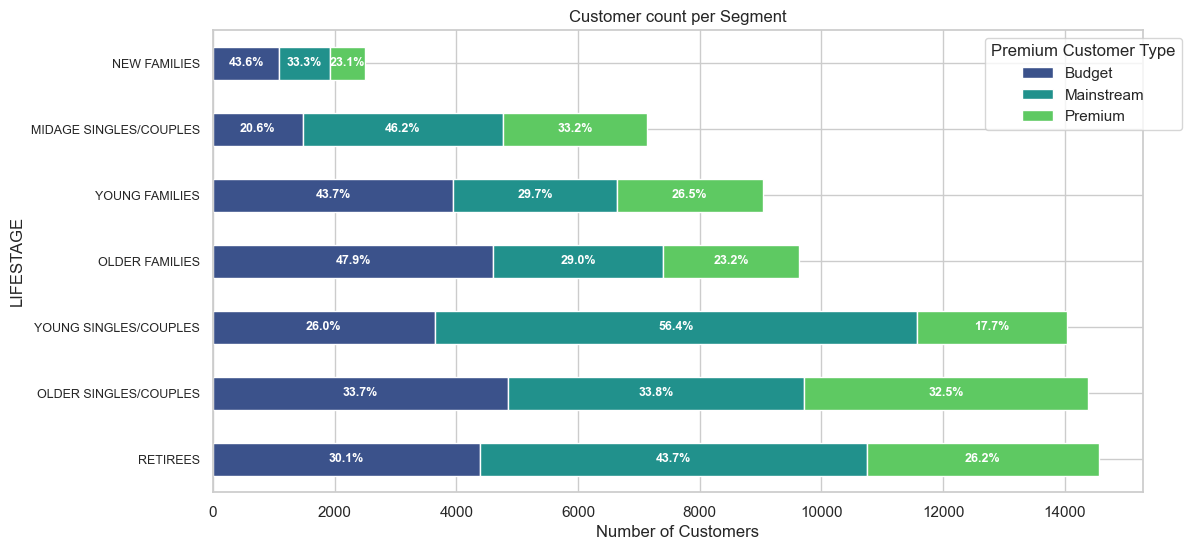

In [55]:
fig,ax = plt.subplots(figsize = (12,6))

# plot a stacked bar chart
colors = sns.color_palette("viridis", n_colors=3)

no_of_cust.iloc[:,:-1].plot(kind = 'barh', stacked = True, ax=ax, color = colors)

for i, (index,row) in enumerate(no_of_cust.iloc[:,:-1].iterrows()):
    left = 0
    for col in no_of_cust.columns[:-1]:
        value=row[col]
        percent = percentage_of_cust.loc[index,col]
        if value>0:
            ax.annotate(f"{percent:.1f}%", xy = (left+value/2, i), ha='center', va='center', color='white', fontweight = 'bold',fontsize =9)
        left+=value

ax.set_title("Customer count per Segment")
ax.set_xlabel('Number of Customers')
ax.tick_params(axis='y', labelsize=9)
plt.legend(title='Premium Customer Type', bbox_to_anchor=(1.05, 1))
plt.show()

#### Insights:
-  Mainstream customers are higher in number among Young Singles/Couples and Retirees. This aligns with higher sales in these segments, suggesting that their total sales contribution is driven by having more customers.
-  Whereas, Budget customers are more prevalent in Older Families and Young Families. This matches with higher sales in these segments, meaning the total sales here are also likely driven by a larger customer base rather than individual spending behavior.

#### Chips Bought Per Customer
-  Calculate the average number of chips bought per customer in each segment.
-  This tells us if some segments buy chips in bulk more often.

In [57]:
merged_data.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NCC,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


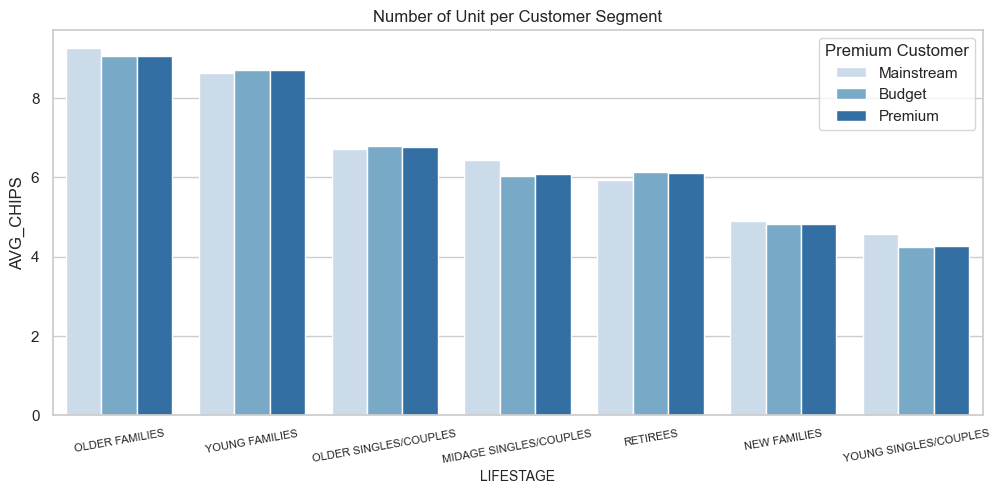

In [82]:
# total chips bought within each customer segment
total_qty = merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].sum()
unique_cust = merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()

avg_chips_per_cust = (total_qty/unique_cust).to_frame(name='AVG_CHIPS')
avg_chips_per_cust = avg_chips_per_cust.sort_values(by='AVG_CHIPS', ascending = False)

#plot
plt.figure(figsize = (12,5))
sns.barplot(data=avg_chips_per_cust, x='LIFESTAGE', y='AVG_CHIPS', hue='PREMIUM_CUSTOMER', palette = 'Blues')
plt.title('Number of Unit per Customer Segment')
plt.xticks(fontsize = 8, rotation =10)
plt.xlabel("LIFESTAGE", fontsize=10)
plt.legend(title="Premium Customer")
plt.show()

#### Insights
-  While Older Families and Young Families don't have the highest customer counts, these customers buy more chips on average than those in other lifestages, this suggests these customers prefer bulk buying rather than frequent small purchases.

#### Average Price Per Unit Sold
-  Find the average price per packet of chips purchased by each segment.

In [86]:
# average price per unit for each segment
avg_price = merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(
    TOTAL_SALES=("TOT_SALES", "sum"), TOTAL_UNITS=("PROD_QTY", "sum")).reset_index()

avg_price["AVG_PRICE_PER_UNIT"] = avg_price["TOTAL_SALES"] / avg_price["TOTAL_UNITS"]
avg_price = avg_price.sort_values(by="AVG_PRICE_PER_UNIT", ascending=False)

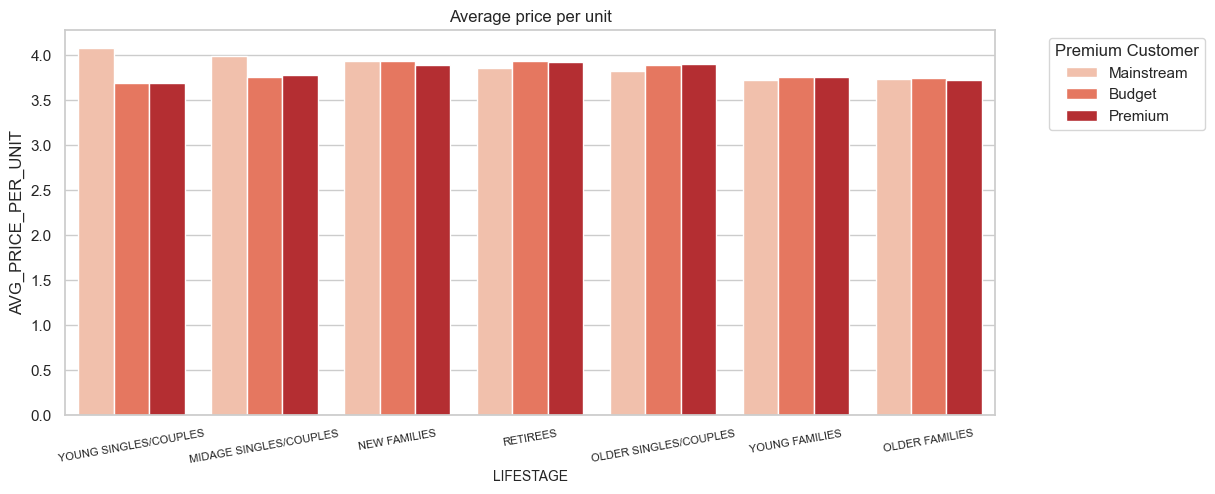

In [89]:
# visualize
plt.figure(figsize=(12,5))
sns.barplot(data=avg_price, x='LIFESTAGE', y='AVG_PRICE_PER_UNIT', hue='PREMIUM_CUSTOMER', palette = 'Reds')
plt.title('Average price per unit')
plt.xticks(fontsize = 8, rotation =10)
plt.xlabel("LIFESTAGE", fontsize=10)
plt.legend(title="Premium Customer", bbox_to_anchor=(1.05, 1))
plt.show()

#### Insights:
-  Mainstream Midage & Young Singles/Couples have the highest price per unit, meaning they are willing to spend more per packet of chips.
-  Other segments don't have significant price differences, for example Premium Retirees and Budget Retirees have nearly the same price per unit around 3.92 & 3.93 respectively, might suggest that they shop based on deals rather than strict price categories.

----------------------------------

#### Perform an independent t-test to check whether the average price per unit is significantly different between:
-  Mainstream Midage & Young Singles/Couples
-  Budget & Premium Midage & Young Singles/Couples

In [100]:
import scipy.stats as stats

# extract groups and get price per unit 
mainstream_prices = merged_data[(merged_data["LIFESTAGE"].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) & 
    (merged_data["PREMIUM_CUSTOMER"] == "Mainstream")].copy()

mainstream_prices["PRICE_PER_UNIT"] = mainstream_prices["TOT_SALES"] / mainstream_prices["PROD_QTY"]
mainstream_prices = mainstream_prices["PRICE_PER_UNIT"]

budget_premium_prices = merged_data[(merged_data["LIFESTAGE"].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) & 
    (merged_data["PREMIUM_CUSTOMER"] != "Mainstream")].copy()

budget_premium_prices["PRICE_PER_UNIT"] = budget_premium_prices["TOT_SALES"] / budget_premium_prices["PROD_QTY"]
budget_premium_prices = budget_premium_prices["PRICE_PER_UNIT"] 

# perform t-test 
t_stat, p_value = stats.ttest_ind(mainstream_prices, budget_premium_prices, equal_var=False, nan_policy='omit')

# One-tailed p-value adjustment
p_value_one_tailed = p_value / 2 if t_stat > 0 else 1 - (p_value / 2)

print(f"T-test statistic: {t_stat}")
print(f"P-value: {p_value_one_tailed}")

T-test statistic: 37.6243885962295
P-value: 3.4836771165090696e-306


#### Insights:
-  The p-value (3.48e-306) is almost zero, meaning the difference is statistically significant. We reject the null hypothesis and confirm that mainstream customers in these segments pay more per unit compared to budget/premium customers.
-  Reasons might be because they are less price-sensitive and might prefer quality, branding, or convenience over price.

--------------------------------------------

#### Analyze brand preference among Mainstream Young Singles/Couples

In [116]:
# total quantity of chips bought by Mainstream Young Singles/Couples
segment1 = merged_data[(merged_data["LIFESTAGE"] == "YOUNG SINGLES/COUPLES") & (merged_data["PREMIUM_CUSTOMER"] == "Mainstream")]

# total quantity of chips bought by everyone else
other =  merged_data[~((merged_data["LIFESTAGE"] == "YOUNG SINGLES/COUPLES") & (merged_data["PREMIUM_CUSTOMER"] == "Mainstream"))]

# total quantity of chips purchased by each group
total_qty_segment1 = segment1["PROD_QTY"].sum()
total_qty_other = other["PROD_QTY"].sum()

# proportion of each brand within the segment
qty_segment1_by_brand = segment1.groupby("BRAND")["PROD_QTY"].sum() / total_qty_segment1

# proportion of each brand within the rest of the population
qty_other_by_brand = other.groupby("BRAND")["PROD_QTY"].sum()/ total_qty_other

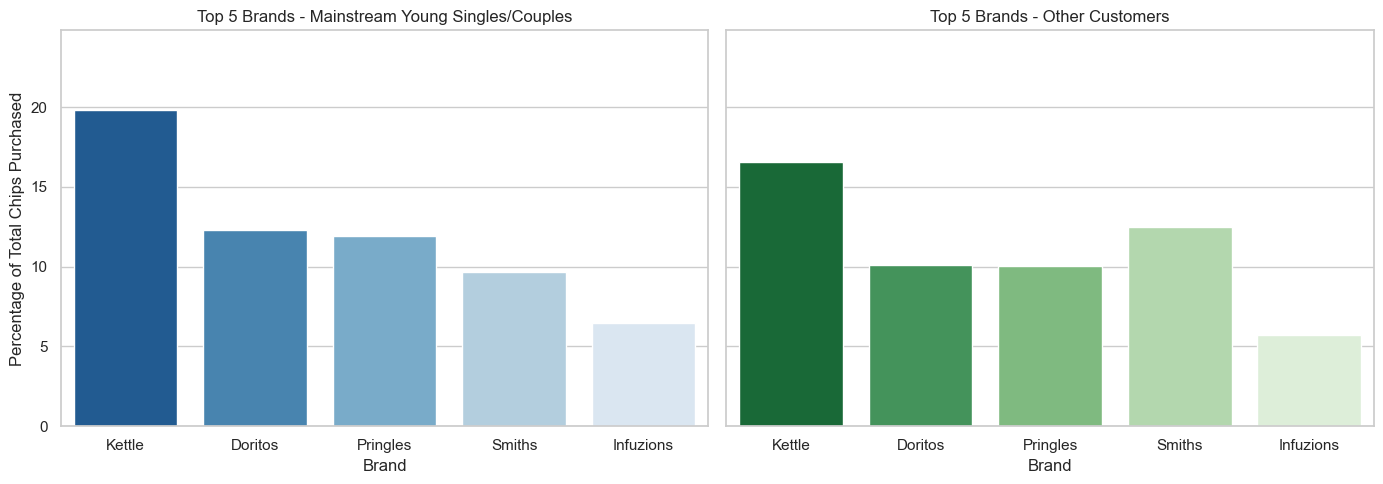

In [117]:
# convert proportions to percentages
segment1_in_per = qty_segment1_by_brand *100
other_in_per = qty_other_by_brand * 100

# get the top 5 brands for each 
top5_segment1 = segment1_in_per.nlargest(5)
top5_other = other_in_per.loc[top5_segment1.index]  # Ensure same brands in both charts

# plot 
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.barplot(x=top5_segment1.index, y=top5_segment1.values, ax=axes[0], palette="Blues_r")
axes[0].set_title("Top 5 Brands - Mainstream Young Singles/Couples")
axes[0].set_ylabel("Percentage of Total Chips Purchased")
axes[0].set_xlabel("Brand")
axes[0].set_ylim(0, top5_segment1.max() + 5)

sns.barplot(x=top5_other.index, y=top5_other.values, ax=axes[1], palette="Greens_r")
axes[1].set_title("Top 5 Brands - Other Customers")
axes[1].set_xlabel("Brand")
axes[1].set_ylim(0, top5_segment1.max() + 5)
plt.tight_layout()
plt.show()

-  Kettle, Doritos, Pringles, Smiths, and Infuzions have the highest total purchases, but are these brands more popular among the target group compared to the rest of the population.

In [127]:
brand_proportions = pd.DataFrame({"targetSegment": qty_segment1_by_brand,"otherCustomers": qty_other_by_brand}).reset_index()

# compute affinity score
brand_proportions["affinityToBrand"] = brand_proportions["targetSegment"] / brand_proportions["otherCustomers"]
brand_proportions = brand_proportions.sort_values(by="affinityToBrand", ascending=False)
brand_proportions

,BRAND,targetSegment,otherCustomers,affinityToBrand
18,Tyrrells,0.031553,0.025693,1.228090
17,Twisties,0.046184,0.037877,1.219314
5,Doritos,0.122761,0.101075,1.214547
9,Kettle,0.197985,0.165554,1.195891
16,Tostitos,0.045411,0.037978,1.195708
11,Pringles,0.119420,0.100635,1.186665
4,Cobs,0.044638,0.039049,1.143119
8,Infuzions,0.064679,0.057065,1.133430
15,Thins,0.060373,0.056987,1.059418
7,Grain Waves,0.032712,0.031188,1.048868


#### Insights:
-  Tyrrells and Twisties, which were not in the top 5 by purchase volume, now appear as the highest affinity brands. This means they are highly preferred within Mainstream Young Singles/Couples segment, even if their total purchase quantity is lower.
-  Kettle, Doritos, Pringles and Infuzions appear in both rankings, meaning they are both popular and have a strong preference among the target segment.
-  Smiths, which was in the top 5 purchases, has an affinity score of only 0.77, meaning it is more popular among other customers and not uniquely preferred by Young Singles/Couples.

In [129]:
# total quantity of chips purchased by each group
total_qty_segment1 = segment1["PROD_QTY"].sum()
total_qty_other = other["PROD_QTY"].sum()

# proportion of purchases by pack size
qty_segment1_by_pack = segment1.groupby("PACK_SIZE")["PROD_QTY"].sum() / total_qty_segment1

# proportion of purchases by pack size within the rest of the population
qty_other_by_pack = other.groupby("PACK_SIZE")["PROD_QTY"].sum()/ total_qty_other

pack_proportions = pd.DataFrame({"targetSegment": qty_segment1_by_pack,"otherCustomers": qty_other_by_pack}).reset_index()

# compute the affinity score
pack_proportions["affinityToPack"] = (pack_proportions["targetSegment"] / pack_proportions["otherCustomers"])
pack_proportions = pack_proportions.sort_values(by="affinityToPack", ascending=False)
print(pack_proportions)

    PACK_SIZE  targetSegment  otherCustomers  affinityToPack
17        270       0.031829        0.025096        1.268281
19        380       0.032160        0.025584        1.257024
18        330       0.061284        0.050162        1.221711
4         134       0.119420        0.100635        1.186665
2         110       0.106280        0.089792        1.183632
14        210       0.029124        0.025121        1.159313
5         135       0.014769        0.013075        1.129505
16        250       0.014355        0.012781        1.123161
9         170       0.080773        0.080986        0.997365
6         150       0.157598        0.163421        0.964368
10        175       0.254990        0.270004        0.944394
8         165       0.055652        0.062268        0.893753
12        190       0.007481        0.012442        0.601268
11        180       0.003589        0.006067        0.591536
7         160       0.006404        0.012373        0.517613
1          90       0.00

#### Insights:
-  270g, 380g, and 330g packs show the highest affinity scores, meaning our target segment is significantly more likely to purchase these larger packs compared to the general population.

In [141]:
merged_data.loc[merged_data["PACK_SIZE"].isin([270,380,330]), ["PROD_NAME","PACK_SIZE","BRAND"]].drop_duplicates()

,PROD_NAME,PACK_SIZE,BRAND
5,Smiths Crinkle Chips Salt & Vinegar 330g,330,Smiths
11,Twisties Cheese 270g,270,Twisties
19,Smiths Crinkle Original 330g,330,Smiths
38,Dorito Corn Chp Supreme 380g,380,Doritos
39,Twisties Chicken270g,270,Twisties
93,Smiths Crnkle Chip Orgnl Big Bag 380g,380,Smiths
119,Cheezels Cheese 330g,330,Cheezels
327,Doritos Cheese Supreme 330g,330,Doritos


#### Insights:
-  Smiths and Doritos and Cheezels dominate the larger pack sizes, making them strong contenders in bulk purchase categories.
-  The 270g pack size received the highest affinity score (~1.27), indicating that target customers are 26% more likely to buy it, and Twisties is the only brand offering this pack size, making it a uniquely favored choice.